In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [224]:
data = pd.read_csv('data/bank.csv', sep=';')

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,no


In [225]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent


In [226]:
nominal_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_features = ['month', 'day_of_week']
target_features = ['y']
other_features = data.columns.difference(nominal_features + ordinal_features + target_features)

weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

ordinal_pipeline = Pipeline([('ordinal', OrdinalEncoder(categories=[months, weekdays]))])
nominal_pipeline = Pipeline([('nominal', OneHotEncoder(drop='if_binary'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ordinal_features),
        ('nom', nominal_pipeline, nominal_features),
        ('passthrough', 'passthrough', other_features)
    ])

In [227]:
X_transformed = pd.DataFrame(preprocessor.fit_transform(X),
                             columns=preprocessor.get_feature_names_out())

X_transformed

,ord__month,ord__day_of_week,nom__job_admin.,nom__job_blue-collar,nom__job_entrepreneur,nom__job_housemaid,nom__job_management,nom__job_retired,nom__job_self-employed,nom__job_services,...,nom__loan_unknown,nom__loan_yes,nom__contact_telephone,nom__poutcome_failure,nom__poutcome_nonexistent,nom__poutcome_success,passthrough__age,passthrough__campaign,passthrough__pdays,passthrough__previous
0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,30.0,2.0,999.0,0.0
1,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,39.0,4.0,999.0,0.0
2,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,999.0,0.0
3,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,38.0,3.0,999.0,0.0
4,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,47.0,1.0,999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,30.0,1.0,999.0,0.0
4115,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,39.0,1.0,999.0,0.0
4116,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,2.0,999.0,1.0
4117,7.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,58.0,1.0,999.0,0.0


In [228]:
X_train, X_test, X_train_transformed, X_test_transformed, y_train, y_test = \
    train_test_split(X, X_transformed, y, train_size=.8, random_state=42)

X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome
324,33,blue-collar,married,high.school,no,yes,no,telephone,may,wed,1,999,0,nonexistent
2350,33,self-employed,single,university.degree,no,no,no,telephone,may,fri,1,999,0,nonexistent
1391,52,admin.,married,high.school,no,no,no,telephone,may,wed,2,999,0,nonexistent
468,32,services,single,high.school,no,unknown,unknown,cellular,may,wed,1,999,1,failure
561,39,unemployed,married,university.degree,no,yes,no,telephone,may,thu,2,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,60,self-employed,married,basic.9y,no,no,no,cellular,aug,tue,13,999,0,nonexistent
466,41,management,divorced,basic.6y,no,no,no,cellular,nov,thu,1,999,0,nonexistent
3092,27,blue-collar,single,high.school,no,yes,no,cellular,jul,wed,1,999,0,nonexistent
3772,34,technician,married,professional.course,no,yes,no,telephone,sep,mon,5,999,0,nonexistent


In [229]:
model = RandomForestClassifier(oob_score=True, random_state=42)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [230]:
oob_error = 1 - model.oob_score_
test_error = 1 - accuracy_score(y_test, model.predict(X_test_transformed))

oob_error, test_error

(0.1056145675265554, 0.10072815533980584)

In [231]:
import matplotlib.pyplot as plt
from collections import defaultdict as dd

In [232]:
importances, trans_features = model.feature_importances_, model.feature_names_in_

feat_to_trans_feat = {tfeat: feat for feat in X.columns for tfeat in trans_features if feat in tfeat}

feature_to_imp = dd(int)
for importance, trans_feature in zip(importances, trans_features):
    feature_to_imp[feat_to_trans_feat[trans_feature]] += importance

feature_to_imp = dict(sorted(feature_to_imp.items(), key=lambda x: x[1], reverse=True))

feature_to_imp

{'age': 0.18734215090607123,
 'month': 0.1267334959710277,
 'job': 0.11287286581690337,
 'education': 0.09032025910979079,
 'day_of_week': 0.0830842314098661,
 'campaign': 0.08005746344506763,
 'poutcome': 0.06894644385067311,
 'pdays': 0.05304447997398497,
 'marital': 0.047773397935993014,
 'housing': 0.046547319155908005,
 'loan': 0.03333063131773721,
 'previous': 0.030310768926274625,
 'default': 0.02020834946725881,
 'contact': 0.019428142713443643}

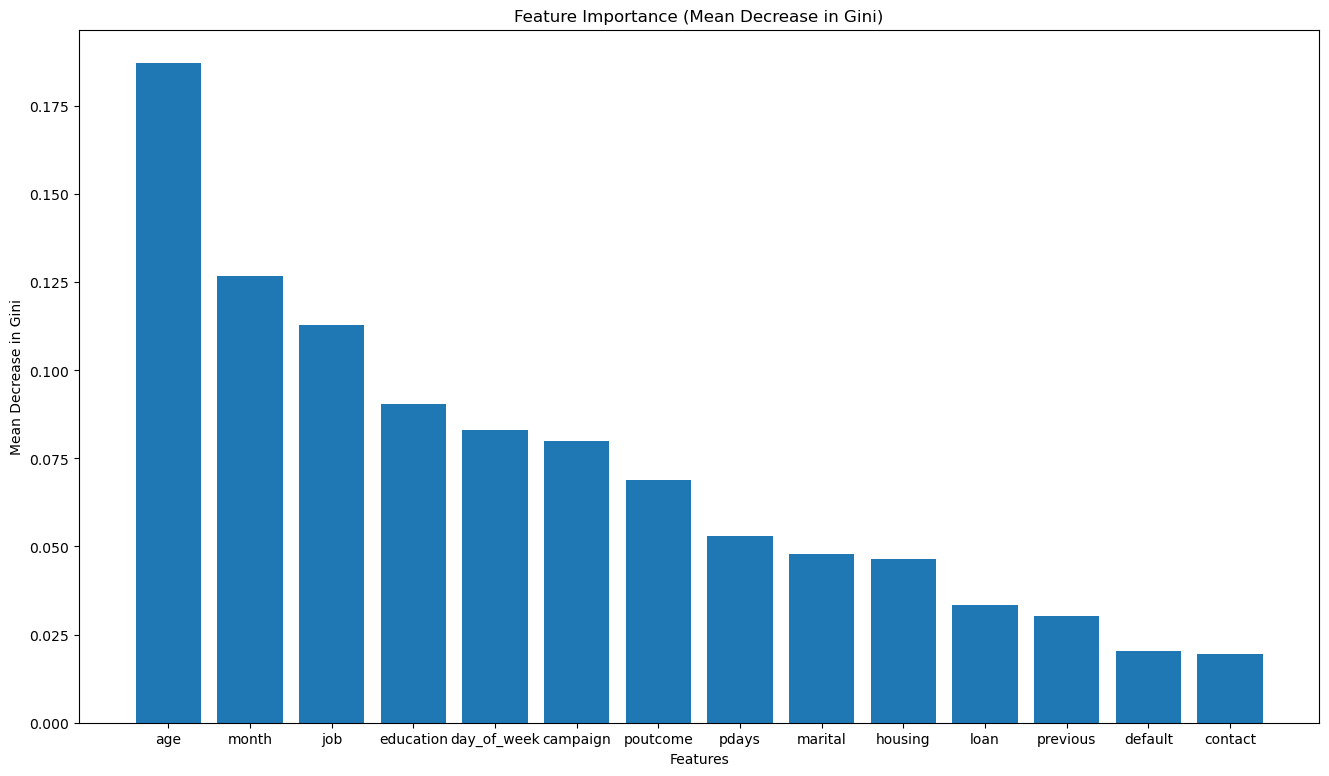

In [233]:
plt.figure(figsize=(16, 9))
plt.title('Feature Importance (Mean Decrease in Gini)')
plt.xlabel('Features')
plt.ylabel('Mean Decrease in Gini')

plt.bar(feature_to_imp.keys(), feature_to_imp.values())

plt.show()

In [234]:
best_features = pd.Index(feature_to_imp.keys())[:7]

X2 = X[best_features]

nominal_features2 = ['job', 'education', 'poutcome']
other_features = best_features.difference(nominal_features2 + ordinal_features + target_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ordinal_features),
        ('nom', nominal_pipeline, nominal_features2),
        ('passthrough', 'passthrough', other_features)
    ])

# idk why i suddenly get a sparse matrix here and not above
X2_transformed = pd.DataFrame(preprocessor.fit_transform(X2).toarray(),
                              columns=preprocessor.get_feature_names_out())

X2_train, X2_test, X2_train_transformed, X2_test_transformed, y2_train, y2_test = \
    train_test_split(X2, X2_transformed, y, train_size=.8, random_state=42)

model2 = RandomForestClassifier(oob_score=True, random_state=42)
model2.fit(X2_train_transformed, y2_train)

# just to see
oob_error = 1 - model2.oob_score_
test_error = 1 - accuracy_score(y2_test, model2.predict(X2_test_transformed))

oob_error, test_error

(0.11471927162367224, 0.11165048543689315)

In [235]:
from sklearn.metrics import roc_curve, auc

In [236]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X_transformed, X2_transformed, y)

model.fit(X1_train, y_train)
model2.fit(X2_train, y_train)
 
y_prob1 = model.predict_proba(X1_test)[:, 1]
y_prob2 = model2.predict_proba(X2_test)[:, 1]

In [237]:
fpr1, tpr1, _ = roc_curve(y_test, y_prob1, pos_label='yes')
fpr2, tpr2, _ = roc_curve(y_test, y_prob2, pos_label='yes')

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

auc1, auc2

(0.7149227776732011, 0.7003702010559245)

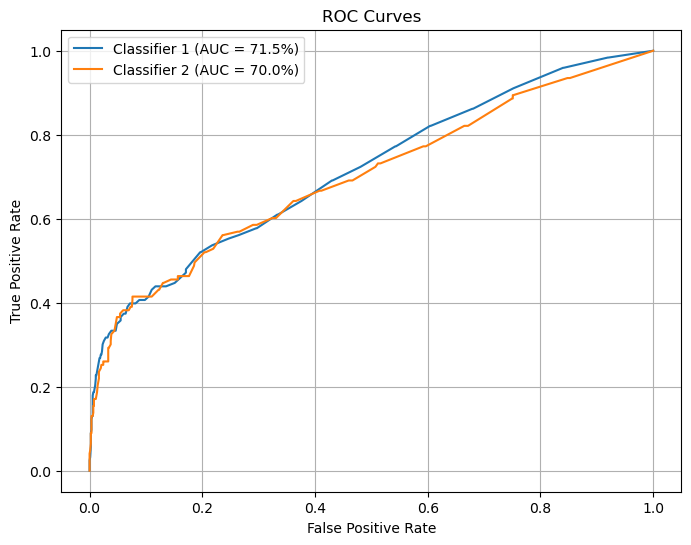

In [238]:
plt.figure(figsize=(8, 6))

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.grid(True)

plt.plot(fpr1, tpr1, label=f'Classifier 1 (AUC = {auc1:.1%})')
plt.plot(fpr2, tpr2, label=f'Classifier 2 (AUC = {auc2:.1%})')

plt.legend()

plt.show()

In [240]:
%store y_test
%store y_prob1
%store y_prob2

Stored 'y_test' (Series)
Stored 'y_prob1' (ndarray)
Stored 'y_prob2' (ndarray)
